In [121]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import seaborn as sns
import seaborn.objects as so

In [40]:
df = pd.read_csv("simulation_df.csv")
df

,Unnamed: 0,count,mean,std,min,10%,50%,90%,max,brier,type,scale,calibration_type,ATE,Balancing
0,0,10000.0,0.143369,0.100964,2.084271e-05,0.022032,0.128495,0.286353,0.586956,0.241069,scaled_expit_0.125,0.125,NaN,6.671276,0.361144
1,0,10000.0,0.017849,0.013045,2.012828e-06,0.003959,0.016051,0.036187,0.066472,0.217277,scaled_expit_0.125_calibrated,0.125,sigmoid_calib,4.856539,0.312415
2,0,10000.0,0.122486,0.085142,7.326419e-06,0.019090,0.110934,0.242946,0.481578,0.233673,scaled_expit_0.25,0.25,NaN,6.340275,0.357344
3,0,10000.0,0.017760,0.013215,5.911120e-06,0.003975,0.015677,0.036658,0.067297,0.217285,scaled_expit_0.25_calibrated,0.25,sigmoid_calib,4.861518,0.312395
4,0,10000.0,0.108863,0.074971,5.874641e-06,0.017012,0.099281,0.214668,0.414444,0.229602,scaled_expit_0.3333333333333333,0.3333333333333333,NaN,6.140921,0.353901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,9,10000.0,0.018341,0.009023,1.288073e-06,0.005074,0.019610,0.027757,0.049282,0.227491,lr_l2_calibrated,lr_l2_model,sigmoid_calib,5.021220,0.363908
316,9,10000.0,0.037416,0.023382,1.639011e-05,0.007363,0.035455,0.072772,0.118752,0.230456,GBT_cv,GBT_cv_model,NaN,5.687130,0.377567
317,9,10000.0,0.015176,0.010402,6.232941e-08,0.002972,0.012723,0.031727,0.052566,0.229830,GBT_cv_calibrated,GBT_cv_model,sigmoid_calib,5.405519,0.368887
318,9,10000.0,0.045534,0.029459,1.101059e-05,0.009253,0.042758,0.090801,0.143354,0.230506,rf_cv,rf_cv_model,NaN,5.750339,0.373702


In [41]:
true_ate = 5
df = df.rename(columns={"Unnamed: 0": "instance"})
df = df.assign(ate_error=lambda d: abs(d["ATE"] - true_ate))

## Deformation-recalibration

In [73]:
defrec = df.loc[df["type"].str.startswith("scaled")]
# defrec.assign(scale=lambda d: d["type"].str.split("_").str[2])
defrec = defrec.assign(calibrated=lambda d: d["calibration_type"].notna())
defrec = defrec.assign(calibrated=lambda d: d["calibrated"].replace(
    {False: "Pre-calibration", True: "Post-calibration"})
)
defrec["scale"] = defrec["scale"].astype(float)
defrec = defrec.loc[defrec["scale"] < 3]
defrec

,instance,count,mean,std,min,10%,50%,90%,max,brier,type,scale,calibration_type,ATE,Balancing,ate_error,calibrated
0,0,10000.0,0.143369,0.100964,0.000021,0.022032,0.128495,0.286353,0.586956,0.241069,scaled_expit_0.125,0.125000,NaN,6.671276,0.361144,1.671276,Pre-calibration
1,0,10000.0,0.017849,0.013045,0.000002,0.003959,0.016051,0.036187,0.066472,0.217277,scaled_expit_0.125_calibrated,0.125000,sigmoid_calib,4.856539,0.312415,0.143461,Post-calibration
2,0,10000.0,0.122486,0.085142,0.000007,0.019090,0.110934,0.242946,0.481578,0.233673,scaled_expit_0.25,0.250000,NaN,6.340275,0.357344,1.340275,Pre-calibration
3,0,10000.0,0.017760,0.013215,0.000006,0.003975,0.015677,0.036658,0.067297,0.217285,scaled_expit_0.25_calibrated,0.250000,sigmoid_calib,4.861518,0.312395,0.138482,Post-calibration
4,0,10000.0,0.108863,0.074971,0.000006,0.017012,0.099281,0.214668,0.414444,0.229602,scaled_expit_0.3333333333333333,0.333333,NaN,6.140921,0.353901,1.140921,Pre-calibration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,9,10000.0,0.023161,0.018395,0.000007,0.006019,0.015136,0.049890,0.081617,0.214362,scaled_expit_1.5_calibrated,1.500000,sigmoid_calib,5.313676,0.351394,0.313676,Post-calibration
304,9,10000.0,0.051750,0.023247,0.000030,0.015418,0.056648,0.079400,0.099347,0.221196,scaled_expit_1.75,1.750000,NaN,3.833481,0.300070,1.166519,Pre-calibration
305,9,10000.0,0.024105,0.019054,0.000003,0.004725,0.016385,0.051421,0.078974,0.214640,scaled_expit_1.75_calibrated,1.750000,sigmoid_calib,5.334212,0.352171,0.334212,Post-calibration
306,9,10000.0,0.070243,0.030837,0.000031,0.021357,0.076909,0.105462,0.124299,0.225449,scaled_expit_2,2.000000,NaN,2.904662,0.285298,2.095338,Pre-calibration


### Slope graph

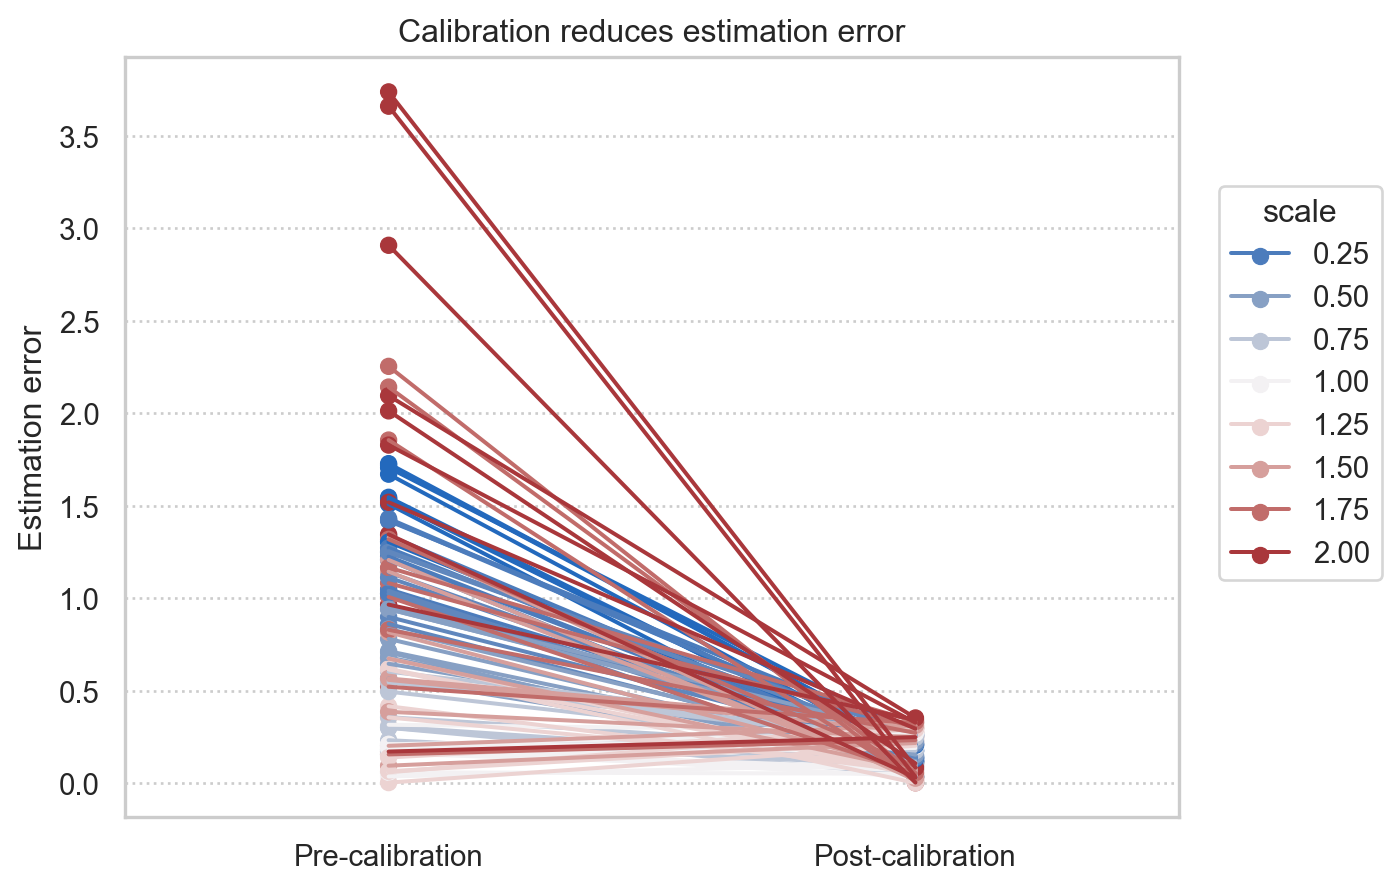

In [159]:
p = so.Plot(
    data=defrec,
    x="calibrated",
    y="ate_error",
    color="scale",
    # marker="calibrated",
    group="instance",
).add(
    so.Line(), # so.Jitter(x=0.05, seed=0),
).add(
    so.Dot(), # so.Jitter(x=0.05, seed=0),
).scale(
    # x=so.Nominal(order=[False, True]),
    color=so.Continuous("vlag").tick(upto=8),
).label(
    y="Estimation error",
    x=None,
    title="Calibration reduces estimation error",
).theme(
    {**sns.axes_style("whitegrid"), "grid.linestyle": ":"}
)
p

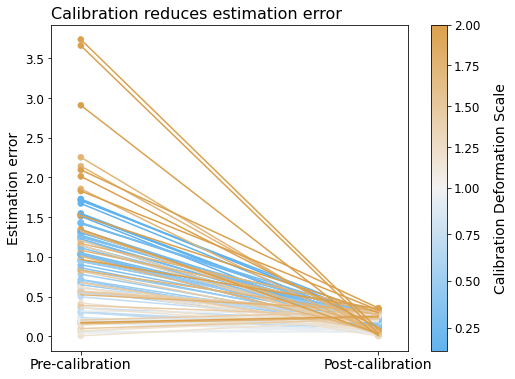

In [211]:
cmap = sns.diverging_palette(
    240, 50, s=80, l=70,
    n=defrec['scale'].nunique(),
    as_cmap=True, 
    center='light'
)
fig, ax = plt.subplots(figsize=(8,6))

p = so.Plot(
    data=defrec,
    x="calibrated",
    y="ate_error",
    color="scale",
    # marker="calibrated",
    group="instance",
).add(
    so.Line(), legend=False, # so.Jitter(x=0.05, seed=0),
).add(
    so.Dot(), legend=False, # so.Jitter(x=0.05, seed=0),
).scale(
    # x=so.Nominal(order=[False, True]),
    color=so.Continuous(cm),
).label(
    y="Estimation error",
    x=None,
    # title="Calibration reduces estimation error",
).on(ax).plot()

# Colorbar:
norm = TwoSlopeNorm(1, defrec['scale'].min(), defrec['scale'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
colorbar = fig.colorbar(sm)
# Font sizes:
colorbar.ax.set_ylabel(
    "Calibration Deformation Scale", 
    fontdict={'size': 14}, labelpad=14
)
colorbar.ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_ylabel(ax.get_ylabel(), fontsize=14)
ax.tick_params(axis='y', which='major', labelsize=12)
ax.tick_params(axis='x', which='major', labelsize=14)
# Other:
ax.set_xlim(-0.1, 1.1)
ax.set_title(
    "Calibration reduces estimation error", 
    loc="left", fontsize=16,
);

In [212]:
fig.savefig("defrec-slopegraph.svg")
fig.savefig("defrec-slopegraph.png")
fig.savefig("defrec-slopegraph.pdf")

### Two-panel facet

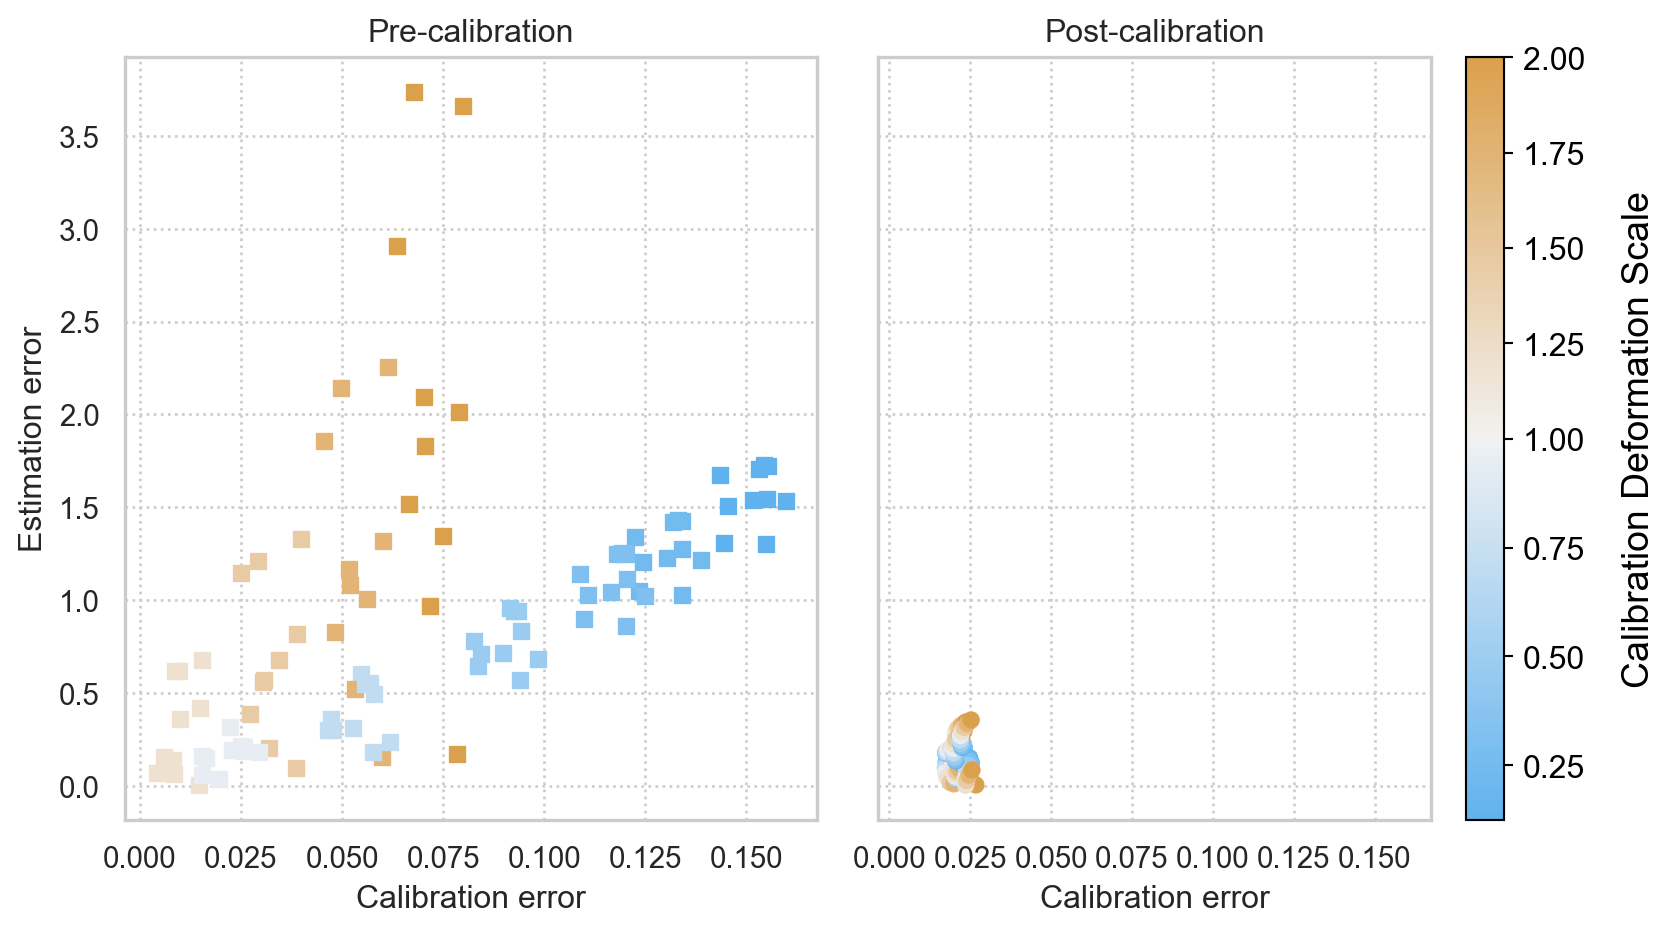

In [217]:
cmap = sns.diverging_palette(
    240, 50, s=80, l=70,
    n=defrec['scale'].nunique(),
    as_cmap=True, 
    center='light'
)

fig = mpl.figure.Figure(figsize=(9, 5))

p = so.Plot(
    data=defrec,
    x="mean",  # "brier",
    y="ate_error",
    color="scale",
    marker="calibrated",
).facet(
    col="calibrated",
).add(
    so.Dot(), legend=False,
).scale(
    # x=so.Nominal(order=[False, True]),
    color=so.Continuous(cm),
    marker=["s", "o"],
).label(
    y="Estimation error",
    x="Calibration error",
    # title="Calibration reduces estimation error",
).theme(
    {**sns.axes_style("whitegrid"), "grid.linestyle": ":"}
).on(fig).plot()

# Colorbar:
norm = TwoSlopeNorm(1, defrec['scale'].min(), defrec['scale'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
colorbar = fig.colorbar(sm)
# Font sizes:
colorbar.ax.set_ylabel(
    "Calibration Deformation Scale", 
    fontdict={'size': 14}, labelpad=14
)
colorbar.ax.tick_params(axis='y', which='major', labelsize=12)

# ax.set_ylabel(ax.get_ylabel(), fontsize=14)
# ax.tick_params(axis='y', which='major', labelsize=12)
# ax.tick_params(axis='x', which='major', labelsize=14)
fig.tight_layout()
p

In [218]:
fig.savefig("defrec-two_panel.svg")
fig.savefig("defrec-two_panel.png")
fig.savefig("defrec-two_panel.pdf")

### Deformation function

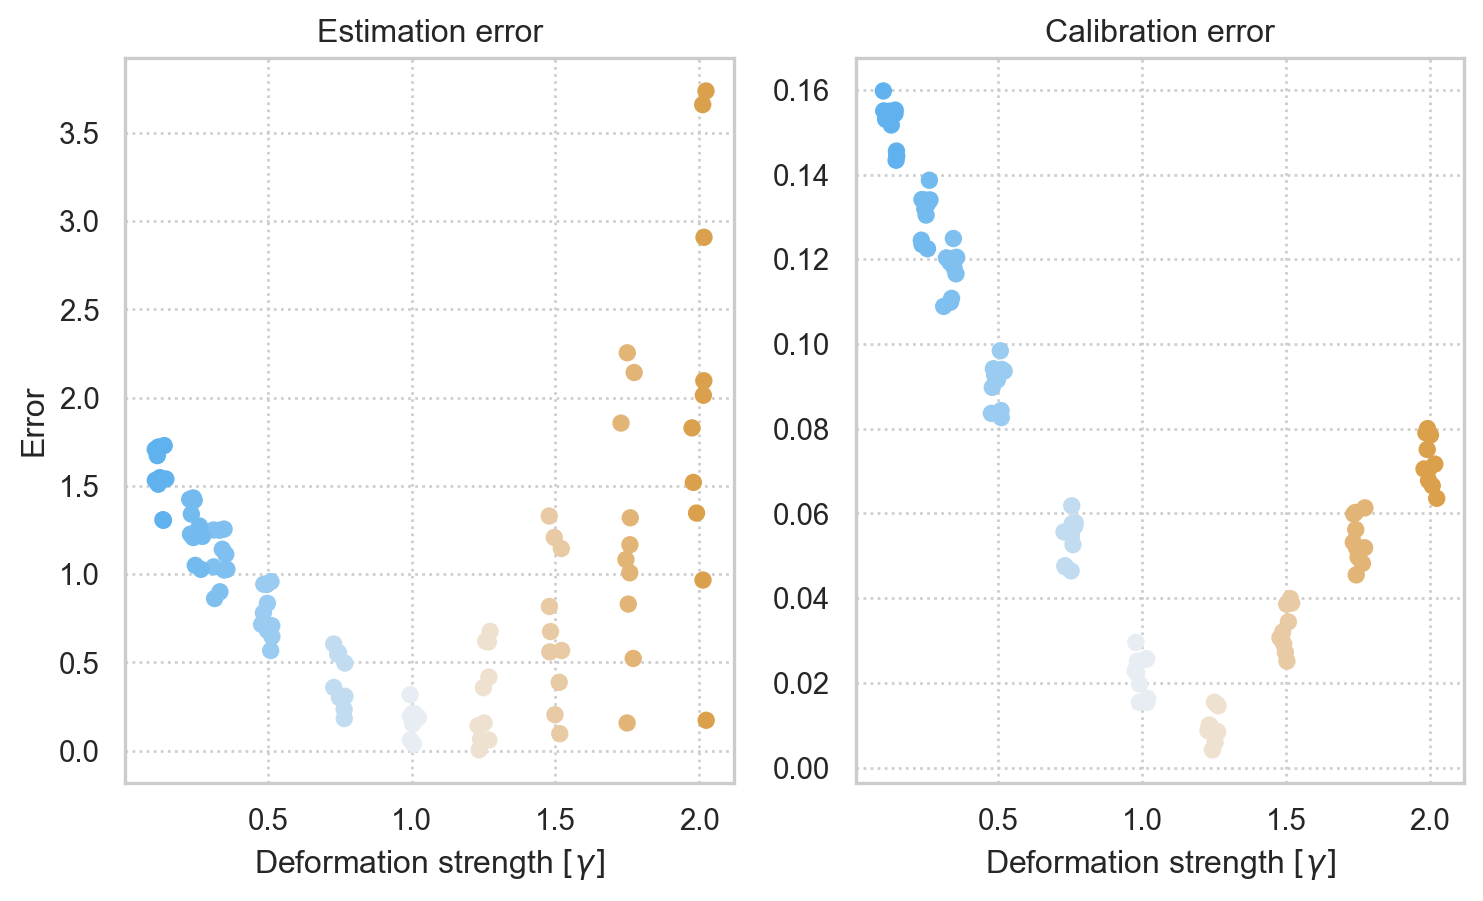

In [215]:
fig = mpl.figure.Figure(figsize=(9, 5))

plot_data = defrec.loc[defrec["calibrated"] == "Pre-calibration"].pivot_table(
    values=["ate_error", "mean"],  # "brier"],
    index=["instance", "scale"],
    columns=None,
).reset_index().melt(
    id_vars=["instance", "scale"],
    var_name="metric",
)

p = so.Plot(
    data=plot_data,
    x="scale",
    y="value",
    color="scale",
).facet(
    col="metric",
).add(
    so.Dot(), so.Jitter(x=0.05, seed=0), legend=False,
).scale(
    # x="log",
    color=so.Continuous(cm),
).share(
    y=False,
).label(
    x="Deformation strength $[\\gamma]$",
    y="Error",
    title=lambda s: {
        "ate_error": "Estimation error", 
        "mean": "Calibration error",
        # "brier": "Calibration error",
    }[s],
).theme(
    {**sns.axes_style("whitegrid"), "grid.linestyle": ":"}
).on(fig).plot()

p

In [216]:
fig.savefig("defrec-gammax-two_panel.svg")
fig.savefig("defrec-gammax-two_panel.png")
fig.savefig("defrec-gammax-two_panel.pdf")

Use `pair` instead of reshaping the data into long format:

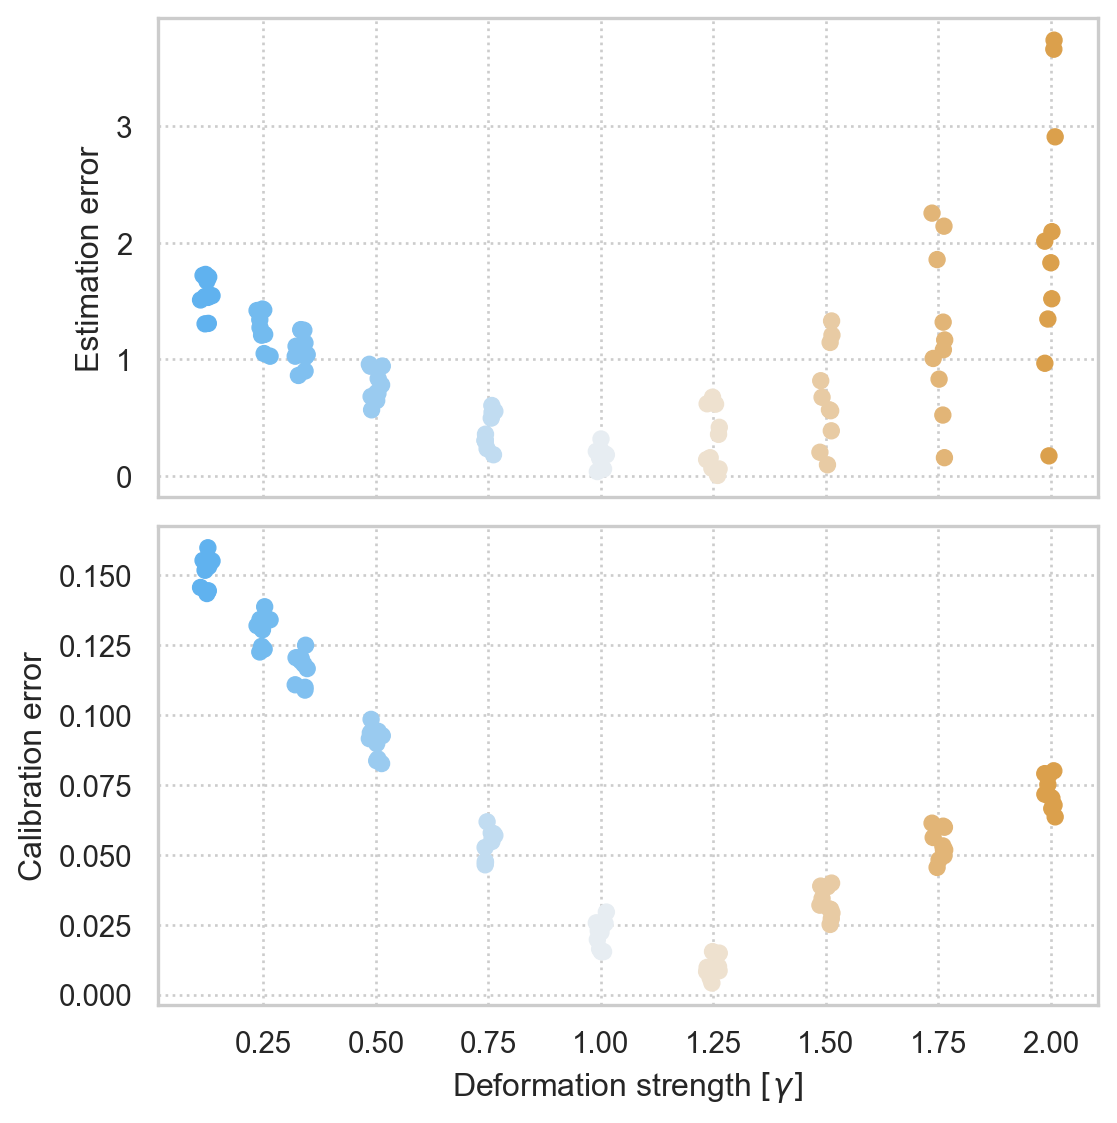

In [209]:
fig = mpl.figure.Figure(figsize=(6, 6))

p = so.Plot(
    data=defrec.loc[defrec["calibrated"] == "Pre-calibration"],
    x="scale",
    color="scale",
).pair(
    y=["ate_error", "mean"],  # "brier"],
).add(
    so.Dot(), so.Jitter(x=0.03, seed=0), legend=False,
).scale(
    # x="log",
    color=so.Continuous(cm),
).share(
    y=False,
).label(
    x="Deformation strength $[\\gamma]$",
    y0="Estimation error",
    y1="Calibration error",
    # y="Error",
    # title=["Estimation error", "Calibration error"],
).theme(
    {**sns.axes_style("whitegrid"), "grid.linestyle": ":"}
).on(fig).plot()

fig.tight_layout()
p

Use `pair` but try and make the figures side-by-side

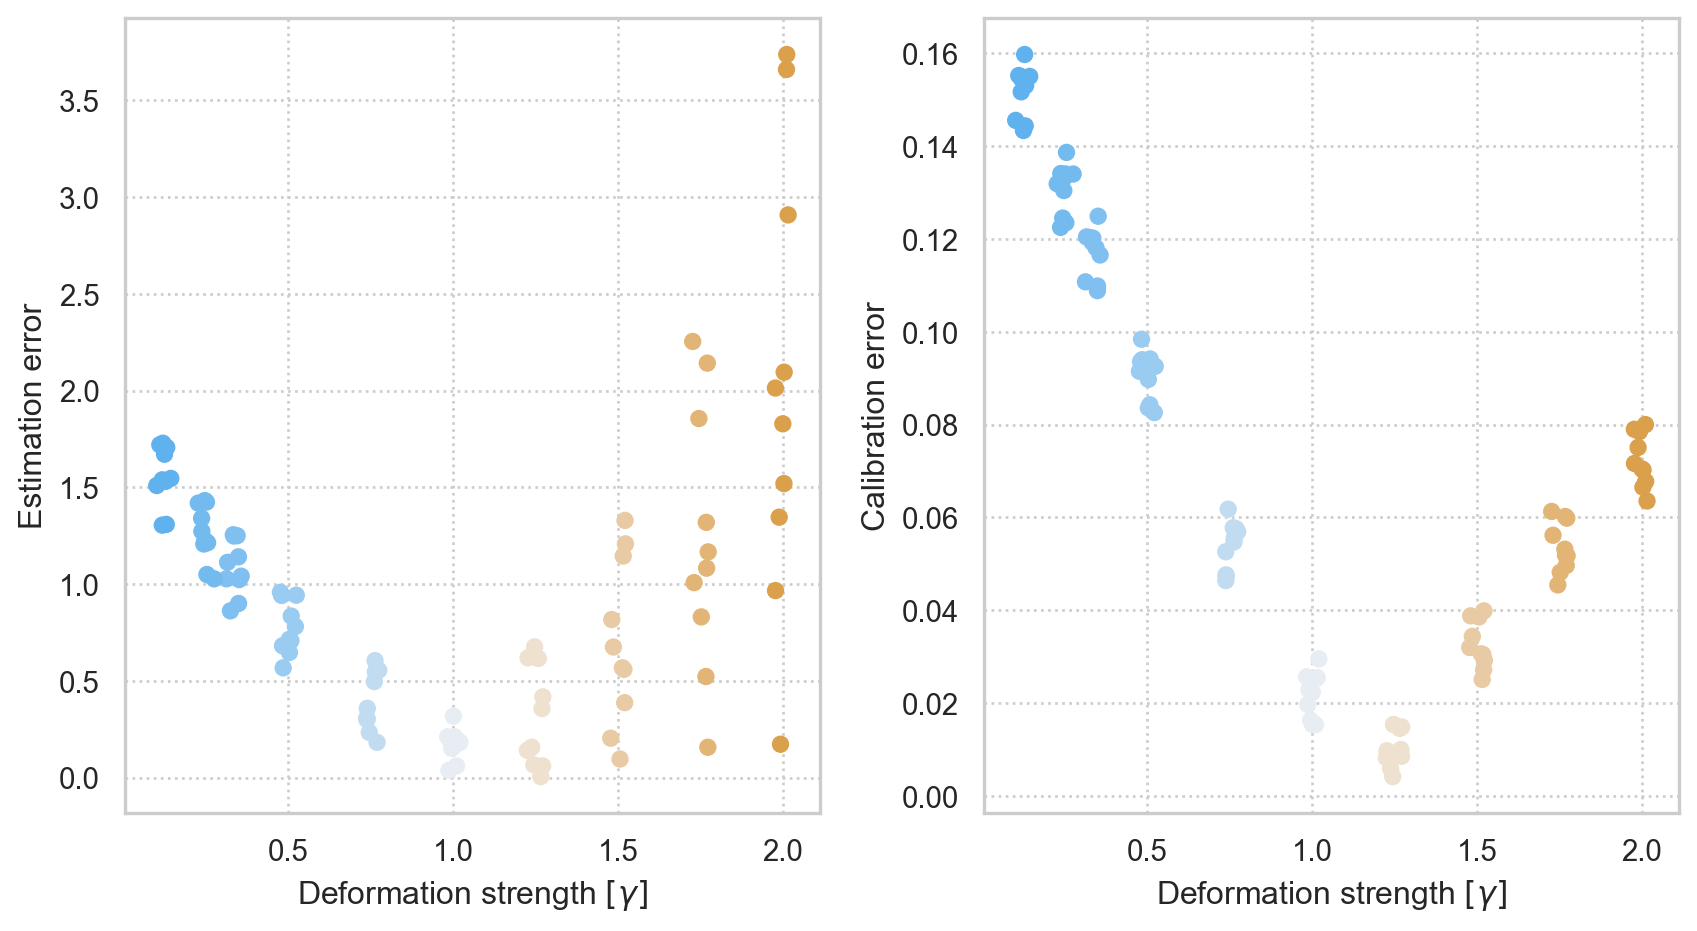

In [210]:
fig = mpl.figure.Figure(figsize=(9, 5))

p = so.Plot(
    data=defrec.loc[defrec["calibrated"] == "Pre-calibration"],
    color="scale",
).pair(
    x=["scale", "scale"],
    y=["ate_error", "mean"],  # "brier"],
    cross=False,
).add(
    so.Dot(), so.Jitter(x=0.05, seed=0), legend=False,
).scale(
    # x="log",
    color=so.Continuous(cm),
).share(
    y=False,
).label(
    x0="Deformation strength $[\\gamma]$",
    x1="Deformation strength $[\\gamma]$",
    y0="Estimation error",
    y1="Calibration error",
    # y="Error",
    # title=["Estimation error", "Calibration error"],
).theme(
    {**sns.axes_style("whitegrid"), "grid.linestyle": ":"}
).on(fig).plot()

fig.tight_layout()
p

## Simulation with models

In [200]:
modf = df.loc[~df["type"].str.startswith("scaled")]
modf = modf.assign(calibrated=lambda d: d["calibration_type"].notna())
modf = modf.assign(calibrated=lambda d: d["calibrated"].replace(
    {False: "Pre-calibration", True: "Post-calibration"})
)
modf = modf.assign(model=lambda d: d["scale"].replace({
    "lr_model": "Logistic regression",
    "lr_l1_model": "LASSO regression",
    "lr_l2_model": "Ridge regression",
    "GBT_cv_model": "Additive trees",  # "Gradient boosting trees",
    "rf_cv_model": "Random forest",
}))
modf

,instance,count,mean,std,min,10%,50%,90%,max,brier,type,scale,calibration_type,ATE,Balancing,ate_error,calibrated,model
22,0,10000.0,0.015749,0.008315,7.135269e-06,0.004153,0.016513,0.023639,0.056218,0.229189,lr,lr_model,NaN,4.999885,0.328421,0.000115,Pre-calibration,Logistic regression
23,0,10000.0,0.015433,0.010056,7.271309e-06,0.003231,0.014401,0.028448,0.060668,0.229210,lr_calibrated,lr_model,sigmoid_calib,5.036599,0.328545,0.036599,Post-calibration,Logistic regression
24,0,10000.0,0.022503,0.012376,1.829182e-05,0.005379,0.023764,0.034818,0.081799,0.229265,lr_l1,lr_l1_model,NaN,5.148602,0.331123,0.148602,Pre-calibration,LASSO regression
25,0,10000.0,0.015560,0.009921,7.139772e-06,0.003339,0.015175,0.026918,0.062241,0.229225,lr_l1_calibrated,lr_l1_model,sigmoid_calib,5.072864,0.327756,0.072864,Post-calibration,LASSO regression
26,0,10000.0,0.048668,0.025933,5.237708e-06,0.011907,0.050663,0.079444,0.133863,0.231104,lr_l2,lr_l2_model,NaN,5.480812,0.344363,0.480812,Pre-calibration,Ridge regression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,9,10000.0,0.018341,0.009023,1.288073e-06,0.005074,0.019610,0.027757,0.049282,0.227491,lr_l2_calibrated,lr_l2_model,sigmoid_calib,5.021220,0.363908,0.021220,Post-calibration,Ridge regression
316,9,10000.0,0.037416,0.023382,1.639011e-05,0.007363,0.035455,0.072772,0.118752,0.230456,GBT_cv,GBT_cv_model,NaN,5.687130,0.377567,0.687130,Pre-calibration,Additive trees
317,9,10000.0,0.015176,0.010402,6.232941e-08,0.002972,0.012723,0.031727,0.052566,0.229830,GBT_cv_calibrated,GBT_cv_model,sigmoid_calib,5.405519,0.368887,0.405519,Post-calibration,Additive trees
318,9,10000.0,0.045534,0.029459,1.101059e-05,0.009253,0.042758,0.090801,0.143354,0.230506,rf_cv,rf_cv_model,NaN,5.750339,0.373702,0.750339,Pre-calibration,Random forest


### Slope graph

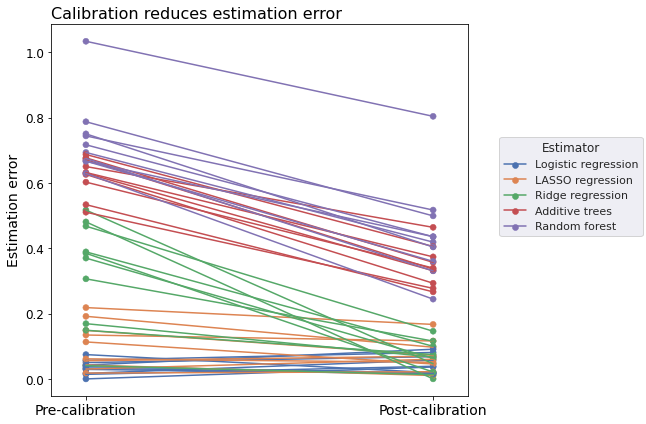

In [201]:
fig, ax = plt.subplots(figsize=(7,6))

p = so.Plot(
    data=modf,
    x="calibrated",
    y="ate_error",
    color="model",
    # marker="calibrated",
    group="instance",
).add(
    so.Line(), legend=True, # so.Jitter(x=0.05, seed=0),
).add(
    so.Dot(), legend=True, # so.Jitter(x=0.05, seed=0),
).scale(
    # x=so.Nominal(order=[False, True]),
    color=so.Nominal(),
).label(
    y="Estimation error",
    x=None,
    color="Estimator",
    # title="Calibration reduces estimation error",
).on(ax).plot()

ax.set_ylabel(ax.get_ylabel(), fontsize=14)
ax.tick_params(axis='y', which='major', labelsize=12)
ax.tick_params(axis='x', which='major', labelsize=14)
# Other:
ax.set_xlim(-0.1, 1.1)
ax.set_title(
    "Calibration reduces estimation error", 
    loc="left", fontsize=16,
);
fig.tight_layout()

In [202]:
fig.savefig("simmodels-slopegraph.svg")
fig.savefig("simmodels-slopegraph.png")